# Warning

The solution notebook took about an hour, in total, to run with the dimension and number of points given below.  You should test this on smaller data sets and give yourself time to run the entire notebook before submitting.

# Project

In [1]:
student_name = 'Salih Kilicli'

## Overview
Given a fixed collection of `N` points in $\mathbb{R}^k$, this project consists of implementing algorithms to find the closest point to the input data $y \in \mathbb{R}^k$.
Here closest is measured in the Euclidian norm. 

## Instructions

### Nearest Neighbors: Generating Data

1. Complete the function `create_column_data` to generate randomly (uniform distribution) `N` points in $\mathbb{R}^k$.  The generated data should be of type `np.array` and have shape `(k, N)`.  Column based data is chosen because the operations we wish to perform on our data will largely use individual points (columns).  **Hint:** The default memory layout for `np.array` is row-major, which means that our column-based operations will need to stride through memory to access the elements of interest, which is not cache-friendly.  When implementing this function pay particular attention to the `order` argument in `np.array`.  

1. Run the given code block to create our input data `X` and a test point `y` using your implementation of `create_column_data`.  `X` should be an `np.array` consisting of 100,000 points in $\mathbb{R}^{1000}$.


### Brute Force

1. Complete the function `nn_brute_force`.  This function takes a test point and a data set (where each column is a data point), and exhaustively computes the distance between the test point and every point in the data set.  The point in the data set with minimal distance to the test point should be returned along with its index as a tuple as follows: `(integer, np.array)`, where `integer` can be any integer type, e.g. `np.int64`, and `np.array` is the nearest point.  The `np.array` in the output should have shape `(k,)`.  In the event that multiple points in the data set are equidistant from the test point, you may arbitrarily choose which to return. If either of the passed arguments are `None` then `(None, None)` should be returned.

1. Run the given code blocks to perfrom a few sanity checks on your implementation. 


### kd-trees

1. Complete the function `nn_create_kd_tree`.  This function should create a `scipy.spatial.KDTree` from the passed data and return the tree object.  If the passed data is `None` then `None` should be returned.

1. Complete the function `nn_query_kd_tree`. This function takes a test_point and a `scipy.spatial.KDTree` as arguments, and queries the tree for the closest point to the test_point.  The point in the tree with minimal distance to the test point should be returned along with its index as a tuple as follows: `(integer, np.array)`, where `integer` can be any integer type, e.g. `np.int64`, and `np.array` is the nearest point.  The `np.array` in the output should have shape `(k,)`.  In the event that multiple points in the data set are equidistant from the test point, you may arbitrarily choose which to return.  If either of the passed arguments are `None` then `(None, None)` should be returned.

1. Run the given code blocks to perfrom a few sanity checks on your implementation. 


### Performance

1. Run the given code blocks to compute the total and average query time for your implementations using the given set of queries.


### Approximate Nearest Neighbors: Setup

1. Complete the function `create_projection_matrix` to create a matrix whose entries are normally distributed.  This matrix will be used to project data generated by `create_column_data` to a lower dimension. 

1. Run the given code block to determine the size of the reduced dimension and create a matrix `A` using your implementation.

1. Run the given code blocks to test your brute force and kd-tree implementations on the projected data set.

1. Answer the questions following the test code blocks.


### Performance

1. Run the given code blocks to time your brute force and kd-tree implementations on the projected data set.

1. Answer the questions following the test code blocks.


### Distortion

1. For an input data `X`, complete the function `compute_distortion`. The distortion is computed as the $\max_{i \ne j} \frac{\|f(X_i)-f(X_j)\|_2}{\|X_i-X_j\|_2} \cdot \max_{i \ne j} \frac{\|X_i-X_j\|_2}{\|f(X_i)-f(X_j)\|_2}$, where $f(X_i) = AX_i$ is the projection $X_i$, the ith column of `X`.

1. Run the given code block to compute the distortion using a small data set and a sample projection matrix `A`, created using your implementation of `create_projection_matrix`. 


### Iteration

1. Complete the function `iterate_reduced_nn` so that it returns a `list` containing the unique indices of nearest neighbors produced by your KDTree implementation operating in the reduced space.  Each iteration (or trial) should create a new matrix `A` using `create_projection_matrix` and apply this to the original input data `X` before building a KDTree and querying it for the point `y`, also projected into the reduced space.  

1. Run the given code block to compute the set of solutions produced by your implemenation of `iterate_reduced_nn`.  
1. Answer the questions following the test code blocks.

1. Complete the function `nn_iterative` using `iterate_reduced_nn` to generate a set of possible nearest neighbor solutions in the reduced space, and then retest only those solution in the original space to find the best approximate nearest neighbor from the given set.

1. Run the given code block and check how close this approximate nearest neighbor is to the one computed using brute force. 


### Choice of Dimension

1. Run the given code blocks to compute the distances of the nearest neighbors generated with your implementation of `nn_iterative` using projections of varying size.


### Iteration vs Dimension 

1. Run the given code blocks to compute the distances of the nearest neighbors generated with your implementation of `nn_iterative` using projections of varying size with varying numbers of iterations.

1. Answer the questions following the test code blocks.



## Submitting Your Assignment

You will submit your completed assignment in two formats:

- Jupyter Notebook (.ipynb)
- HTML (.html)

##### Jupyter Notebook (.ipynb)
You may directly use this notebook to complete your assignment or you may use an external editor/IDE of your choice.  However, to submit your code please ensure that your code works in this notebook.  
  
##### HTML (.html)
To create an HTML file for your assignment simply select `File > Download as > HTML (.html)` from within the Jupyter Notebook.  
  
Both files should be uploaded to [Canvas](https://canvas.tamu.edu).

## Helper Functions

In [2]:
import math
import numpy as np
import scipy.linalg as LA
from scipy import spatial
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid') # ['seaborn-darkgrid', 'ggplot', bmh', 'fivethirtyeight']

run_time_start = time.perf_counter()

# Compute distance between two points 
def distance(X, y):
    return LA.norm(X - y.reshape(X.shape), ord = 2)

In [3]:
a = np.random.uniform(-1, 1, size=(10,1))
b = np.random.uniform(-1, 1, size=(10,1))
distance(a, b)

1.792514403002002

__Note:__ 

When $y$ is a column vector, NumPy library broadcasts the $y$ vector for $X - y$, that is, ```(X - y).shape = X.shape```. However, it is problematic when ```y.shape = (X.shape[0], )```. To enforce this we reshaped $y$. Let $x_j^i$ denote the $j^{th}$ element of $i^{th}$ column vector of $X$ matrix. Then, the broadcasting works like shown in below:

[//]: ![Screen%20Shot%202020-10-16%20at%204.33.40%20PM.png](attachment:Screen%20Shot%202020-10-16%20at%204.33.40%20PM.png) "Use the ss instead if it doesn't work in github"

$$X - \bf{y} = \begin{bmatrix} 
\vdots \ \vdots \ \dots \vdots \\
\bf{x^1} \ \bf{x^2} \ \dots \ \bf{x^N} \\
\vdots \ \vdots \ \dots \ \vdots \\
\end{bmatrix}_{\ (k \times N)}  -  \quad \begin{bmatrix} 
y_1 \\
y_2 \\
\vdots \\
y_k \\
\end{bmatrix}_{\ (k \times 1)} \longrightarrow \quad \begin{bmatrix} 
x_1^1, x_1^2, \dots, x_1^N \\
x_2^1, x_2^2, \dots, x_2^N \\
\vdots \\
x_k^1, x_k^2, \dots, x_k^N \\
\end{bmatrix}_{\ (k \times N)} - \quad \begin{bmatrix} 
y_1, y_1, \dots, y_1 \\
y_2, y_2, \dots, y_2 \\
\vdots \\
y_k, y_k, \dots, y_k \\
\end{bmatrix}_{\ (k \times N)} =
\begin{bmatrix} 
x_1^1 - y_1, x_1^2 - y_1, \dots, x_1^N - y_1\\
x_2^1 - y_2, x_2^2 - y_2, \dots, x_2^N - y_2\\
\vdots \\
x_k^1 - y_k, x_k^2 - y_k, \dots, x_k^N -y_k \\
\end{bmatrix}_{\ (k \times N)}$$

## Hints

When developing your code be sure to use managable data sets (small tests) so that you do not waste time. Once you are satisfied with your work run the notebook again with the specified values before submission.


## Your Solution: Nearest Neighbors - Generating Data

Complete the function `create_column_data` to generate randomly (uniform distribution) `N` points in $\mathbb{R}^k$.  The generated data should be of type `np.array` and have shape `(k, N)`.  Column based data is chosen because the operations we wish to perform on our data will largely use individual points (columns).  **Hint:** The default memory layout for `np.array` is row-major, which means that our column-based operations will need to stride through memory to access the elements of interest, which is not cache-friendly.  When implementing this function pay particular attention to the `order` argument in `np.array`. 

In [4]:
np.random.seed(1234)

def create_column_data(num_elements, dimension, lower_bound = -1.0, upper_bound = 1.0):    
    """
    The returned np.array has shape (k, N) = (dimension, num_elements).
    Each column of the returned object is a data point containing values that 
    fall in the half-open interval [lower_bound, upper_bound). The memory layout of
    the returned np.array is Fortran order (column major).
    """
    data = np.random.uniform(low = -1.0, high = +1.0, size = dimension*num_elements)
    
    return data.reshape((dimension, num_elements), order= 'F')

__Note:__ Notice that for a given $n \times m$ matrix A:
        
-   ```A[:,  0 ].shape =   (n,)```
-   ```A[:, [0]].shape = (n, 1)```

In [5]:
k = 5; N = 10
data = create_column_data(N, k, lower_bound = -1.0, upper_bound = 1.0)
print(f"Notice the difference between 2 slicing methods:\n")
print(f"data[:, [0]].shape = {data[:, [0]].shape} (a column vector)\ndata[:,  0 ].shape = {data[:, 0].shape}\n")
print(f"data =\n\n{data.round(3)}")

Notice the difference between 2 slicing methods:

data[:, [0]].shape = (5, 1) (a column vector)
data[:,  0 ].shape = (5,)

data =

[[-0.617 -0.455 -0.284  0.122 -0.27   0.303  0.738  0.409 -0.88   0.067]
 [ 0.244 -0.447  0.002  0.006  0.231 -0.206 -0.128 -0.562 -0.631 -0.913]
 [-0.125  0.604  0.367 -0.972 -0.849  0.577  0.604  0.85  -0.905  0.123]
 [ 0.571  0.916  0.425  0.546 -0.262 -0.366 -0.712 -0.116  0.35  -0.341]
 [ 0.56   0.752 -0.259  0.765  0.866  0.136  0.409  0.819  0.189  0.006]]


### Test Code

Run the following code block to create our input data `X` and a test point `y` using your implementation of `create_column_data`.  `X` should be an `np.array` consisting of 100,000 points in $\mathbb{R}^{1000}$.  **Tip:** During your initial testing you may wish to consider smaller data sets of lower dimension to reduce the time each your tests takes.  When submitting your solution do not forget to reset these values.

In [6]:
num_elements = 100000
data_dimension = 1000

t0 = time.perf_counter()
X = create_column_data(num_elements, data_dimension, -1.0, 1.0)
y = create_column_data(1, data_dimension, -1.0, 1.0)
t1 = time.perf_counter()

print(f"Elapsed time during the whole program in seconds: {round(t1 - t0, 2)} s\n") 
print(f"X.shape := {X.shape}\ny.shape := {y.shape}")

Elapsed time during the whole program in seconds: 1.43 s

X.shape := (1000, 100000)
y.shape := (1000, 1)


## Your Solution: Brute Force

Complete the function `nn_brute_force`.  This function takes a test point and a data set (where each column is a data point), and exhaustively computes the distance between the test point and every point in the data set.  The point in the data set with minimal distance to the test point should be returned along with its index as a tuple as follows: `(integer, np.array)`, where `integer` can be any integer type, e.g. `np.int64`, and `np.array` is the nearest point.  The `np.array` in the output should have shape `(k,)`.  In the event that multiple points in the data set are equidistant from the test point, you may arbitrarily choose which to return. If either of the passed arguments are `None` then `(None, None)` should be returned.

In [7]:
def nn_brute_force(test_point, data):
    """
    Computes the distance between test_point and every column in data.  The function
    assumes that the number of elements in test_point matches the length of each column
    in data.  The column with minimum distance is returned via a tuple containing the
    index of the column from data and the column itself with shape modified to match 
    test_point.  Note that this function returns a view of the column from data and not
    a copy.
    """
    # Checking == None creates problems for arrays (need to use .any() or .all())
    boolean = (test_point is None or data is None)

    # If neither is None, then let's create a np.array that keeps the distances 
    if not boolean:
        #take advantage of broadcasting and vectorizing to speed up
        dist = LA.norm(data - test_point.reshape(-1, 1), ord = 2, axis = 0)
        idx  = dist.argmin()   # identify the index of min value
        arr  = data[:, idx]    # select the array giving min dist
    
    return (None, None) if boolean else (idx, arr)

In [8]:
X0 = create_column_data(100, 3, -1.0, 1.0)
y0 = create_column_data(1, 3, -1.0, 1.0)
print(f"X0.shape = {X0.shape}, y0.shape = {y0.shape}\n")
print(f"nn_brute_force(None, None) = {nn_brute_force(None, None)}\n")
print(f"nn_brute_force(y0, X0) = {nn_brute_force(y0, X0)}")

X0.shape = (3, 100), y0.shape = (3, 1)

nn_brute_force(None, None) = (None, None)

nn_brute_force(y0, X0) = (74, array([ 0.17671997, -0.33291985,  0.79457074]))


### Test Code

Run the following code blocks to perfrom a few sanity checks on your implementation. 

In [9]:
t0 = time.perf_counter()
(idx, nn) = nn_brute_force(y, X)
t1 = time.perf_counter()
bf_time = round(t1 - t0, 2)

brute_force_idx = idx
brute_force_distance = distance(y, nn)
print(f'Nearest Neighbor found at index {brute_force_idx} w/ distance {brute_force_distance} in {bf_time} seconds')

Nearest Neighbor found at index 91300 w/ distance 23.734326838182938 in 1.23 seconds


Choose 10 random points from the data set and verify that `nn_brute_force` returns the correct point in each test.  

In [10]:
num_test_points = 10

for i in np.random.choice(num_elements, num_test_points):
    test_point = X[:, i]
    (idx, nn) = nn_brute_force(test_point, X)
    if idx != i:
        if distance(X[:, i], nn) == 0.0:
            print(f'* WARNING: Duplicate data point was found! --OR-- ERROR: Incorrect index returned (wanted {i}, found {idx})')
        else:
            print('* ERROR: Incorrect data point returned for test index', i)
    elif distance(X[:,i], nn) > 0.0:
        print('* ERROR: Incorrect data point returned for test index', i)
    else:
        print(f'TEST {i}: SUCCESS')      

TEST 75133: SUCCESS
TEST 2310: SUCCESS
TEST 23864: SUCCESS
TEST 77642: SUCCESS
TEST 51128: SUCCESS
TEST 44773: SUCCESS
TEST 38879: SUCCESS
TEST 65008: SUCCESS
TEST 12673: SUCCESS
TEST 19444: SUCCESS


In [11]:
arguments = [[None, X], 
             [y, None],
             [None, None]]

for arg in arguments:
    str_args = [type(a) if a is not None else None for a in arg]
    if nn_brute_force(*arg) != (None, None):
        print(f'TEST ({str_args}): Failed')
    else:
        print(f'TEST ({str_args}): SUCCESS')

TEST ([None, <class 'numpy.ndarray'>]): SUCCESS
TEST ([<class 'numpy.ndarray'>, None]): SUCCESS
TEST ([None, None]): SUCCESS


## Your Solution: kd-trees

Complete the function `nn_create_kd_tree`.  This function should create a `scipy.spatial.KDTree` from the passed data and return the tree object.  If the passed data is `None` then `None` should be returned.

In [12]:
def nn_create_kd_tree(data):
    """
    data is a set of column-based points to be spatially sorted into a kd-tree.
    This function returns a scipy.spatial.KDTree object representing data or 
    None if data is None.
    """
    return None if (data is None) else spatial.KDTree(data)

Complete the function `nn_query_kd_tree`. This function takes a test_point and a `scipy.spatial.KDTree` as arguments, and queries the tree for the closest point to the test_point.  The point in the tree with minimal distance to the test point should be returned along with its index as a tuple as follows: `(integer, np.array)`, where `integer` can be any integer type, e.g. `np.int64`, and `np.array` is the nearest point.  The `np.array` in the output should have shape `(k,)`.  In the event that multiple points in the data set are equidistant from the test point, you may arbitrarily choose which to return.  If either of the passed arguments are `None` then `(None, None)` should be returned.

In [13]:
def nn_query_kd_tree(test_point, tree):
    """
    Given a test_point and a scipy.spatial.KDTree this function queries the
    kd-tree for the closest point to test_point.  The function returns a tuple
    containing the index of the closest point in the tree along with the 
    closest point itself reshaped to match the shape of test_point.  
    If either argument is None then (None, None) is returned.
    """
    # Checking == None creates problems for arrays (need to use .any() or .all())
    boolean = (test_point is None or tree is None)

    # If neither is None, then let's create a np.array that keeps the distances 
    if not boolean:
        #take advantage of broadcasting
        dist = LA.norm(tree.data - test_point.reshape(-1, 1), ord = 2, axis = 0)
        idx  = dist.argmin()
        arr  = tree.data[:, idx]
    
    return (None, None) if boolean else (idx, arr)

### Test Code

Run the following code blocks to perfrom a few sanity checks on your implementation. 

In [14]:
tree = nn_create_kd_tree(X)

t2 = time.perf_counter()
(idx, nn) = nn_query_kd_tree(y, tree)
t3 = time.perf_counter()
kd_time = round(t3 - t2, 2)

kdtree_idx = idx
kdtree_distance = distance(y, nn)
print(f'Nearest Neighbor found at index {kdtree_idx} with distance {kdtree_distance} within {kd_time} seconds')

if kdtree_distance != brute_force_distance:
    print('Brute Force and KDTree give different results.  Something is amiss.')
else:
    print('Brute Force and KDTree give the same distance.')

Nearest Neighbor found at index 91300 with distance 23.734326838182938 within 1.11 seconds
Brute Force and KDTree give the same distance.


Choose 10 random points from the data set and verify that `nn_query_kd_tree` returns the correct point in each test.  


In [15]:
num_test_points = 10

for i in np.random.choice(num_elements, num_test_points):
    test_point = X[:, i]
    (idx, nn) = nn_query_kd_tree(test_point, tree)
    if idx != i:
        if distance(X[:,i], nn) == 0.0:
            print(f'* WARNING: Duplicate data point was found! --OR-- ERROR: Incorrect index returned (wanted {i}, found {idx})')
        else:
            print('* ERROR: Incorrect data point returned for test index', i)
    elif distance(X[:,i], nn) > 0.0:
        print('* ERROR: Incorrect data point returned for test index', i)
    else:
        print(f'TEST {i}: SUCCESS') 

TEST 47723: SUCCESS
TEST 27527: SUCCESS
TEST 42369: SUCCESS
TEST 90245: SUCCESS
TEST 40826: SUCCESS
TEST 40618: SUCCESS
TEST 13691: SUCCESS
TEST 71594: SUCCESS
TEST 54841: SUCCESS
TEST 82603: SUCCESS


Verify that `(None, None)` is returned if either argument is `None`.

In [16]:
arguments = [[None, tree], 
             [y, None],
             [None, None],
             [y, nn_create_kd_tree(None)]]

for arg in arguments:
    str_args = [type(a) if a is not None else None for a in arg]
    if nn_query_kd_tree(*arg) != (None, None):
        print(f'TEST ({str_args}): Failed')
    else:
        print(f'TEST ({str_args}): SUCCESS')

TEST ([None, <class 'scipy.spatial.kdtree.KDTree'>]): SUCCESS
TEST ([<class 'numpy.ndarray'>, None]): SUCCESS
TEST ([None, None]): SUCCESS
TEST ([<class 'numpy.ndarray'>, None]): SUCCESS


## Performance

The following blocks will execute many queries using your implementation and output the total and average time taken for each method.  Note that we are using [`time.perf_counter`](https://docs.python.org/3/library/time.html#time.perf_counter), but there are other options.  If you are using Python v3.7 or higher there is also a `time.perf_counter_ns` that returns time as nanoseconds, however either of the perf_counter functions will use a clock with the highest available resolution to measure short durations.  See the documentation for more details.

**[timeit](https://docs.python.org/3/library/timeit.html)** is an alternative function for measuring small code snippets, and can be especially handy on the command line.

Run the following code blocks to compute the total and average query time for your implementations using the given set of queries.

In [17]:
num_time_tests = 100
queries = create_column_data(num_time_tests, data_dimension)

In [18]:
# test {num_time_tests} queries using brute force
start = time.perf_counter()
for query in queries.T:
    (idx, nn) = nn_brute_force(query, X)
stop = time.perf_counter()
query_time = stop - start

brute_force_total_time = query_time

print('Brute Force:')
print(f'    Total Query Time: {query_time} seconds')
print(f'    Average Query Time: {query_time/num_time_tests} seconds')
print(f'    Total Time: {brute_force_total_time} seconds')

Brute Force:
    Total Query Time: 110.580262375 seconds
    Average Query Time: 1.10580262375 seconds
    Total Time: 110.580262375 seconds


In [19]:
# test {num_time_tests} queries using kdtree
start = time.perf_counter()
tree = nn_create_kd_tree(X)  
stop = time.perf_counter()
tree_build_time = stop - start

start = time.perf_counter()
for query in queries.T:
    (idx, nn) = nn_query_kd_tree(query, tree)
stop = time.perf_counter()
query_time = stop - start

kdtree_total_time = query_time + tree_build_time

print('KDTreee:')
print(f'    Total Query Time: {query_time} seconds')
print(f'    Average Query Time: {query_time/num_time_tests} seconds')
print(f'    Tree Build Time: {tree_build_time} seconds')
print(f'    Total Time: {kdtree_total_time} seconds')

KDTreee:
    Total Query Time: 110.67987464899997 seconds
    Average Query Time: 1.1067987464899998 seconds
    Tree Build Time: 11.099447381000004 seconds
    Total Time: 121.77932202999997 seconds


## Your Solution: Approximate Nearest Neighbors - Setup

Complete the function `create_projection_matrix` to create a matrix whose entries are normally distributed.  This matrix will be used to project data generated by `create_column_data` to a lower dimension. 

In [20]:
def create_projection_matrix(n, m): 
    """
    Returns an np.array with n rows and m columns whose values are randomly sampled
    from a normal distribution (0.0, 1.0).  The memory layout for the returned
    np.array will be row-major. Scale the array with 1/sqrt(reduced_dimension) = 1/sqrt(n).
    """
    # Default mean = 0, std = 1 already
    # Default layout row-major np.array as well
    return np.random.normal(size = (n, m)) / np.sqrt(n)

### Test Code

Run the following code block to determine the size of the reduced dimension and create a matrix `A` using your implementation.

In [21]:
# Fix C and epsilon and use Johnson-Lindenstrauss Lemma from the notes to 
# find the smallest reduced dimension (k in the notes)

C = 2.5       # C \in (0,\inf)
epsilon = 0.5 # epsilon \in (0,\inf)

# k >= C log(n) / eps**2, we use ceiling to ensure k is an integer for our map

reduced_dimension = math.ceil(C * math.log(data_dimension) / epsilon**2)

print('Creating map from dimension', data_dimension, 'to', reduced_dimension)
A = create_projection_matrix(reduced_dimension, data_dimension)

Creating map from dimension 1000 to 70


Run the following code blocks to test your brute force and kd-tree implementations on the projected data set.

In [22]:
(idx, nn) = nn_brute_force(A@y, A@X)

reduced_dim_brute_force_distance = distance(y, X[:,idx])
print(f'Reduced Dimension Nearest Neighbor found at index {idx} with distance {reduced_dim_brute_force_distance} in original space')
print(f'Original Nearest Neighbor found at index {brute_force_idx} with distance {brute_force_distance}')

Reduced Dimension Nearest Neighbor found at index 70309 with distance 25.635893465912176 in original space
Original Nearest Neighbor found at index 91300 with distance 23.734326838182938


In [23]:
tree = nn_create_kd_tree(A@X)

(idx, nn) = nn_query_kd_tree(A@y, tree)

reduced_dim_kdtree_distance = distance(y, X[:,idx])
print(f'Nearest Neighbor found at index {idx} with distance {reduced_dim_kdtree_distance} in original space')
print(f'Original Nearest Neighbor found at index {kdtree_idx} with distance {kdtree_distance}')

Nearest Neighbor found at index 70309 with distance 25.635893465912176 in original space
Original Nearest Neighbor found at index 91300 with distance 23.734326838182938


### Short Answer: 

1. Did the brute force and KDTree methods above produce the same result in the reduced space as they did in the original dimension?  Why or why not?

## Performance

Run the following code blocks to time your brute force and kd-tree implementations on the projected data set.

In [24]:
start = time.perf_counter()
reduced_X = A@X
reduced_queries = A@queries
stop = time.perf_counter()
dim_reduct_time = stop - start

start = time.perf_counter()
for query in reduced_queries.T:
    (idx, nn) = nn_brute_force(query, reduced_X)
stop = time.perf_counter()
query_time = stop - start

reduced_dim_brute_force_total_time = query_time + dim_reduct_time

print('Reduced Dimension Brute Force:')
print(f'    Total Query Time: {query_time} seconds')
print(f'    Average Query Time: {query_time/num_time_tests} seconds')
print(f'    Dimension Reduction Time: {dim_reduct_time} seconds')
print(f'    Total Time: {reduced_dim_brute_force_total_time} seconds')

print(f'\nBrute Force Total Time (original dimension): {brute_force_total_time} seconds')

Reduced Dimension Brute Force:
    Total Query Time: 4.135461924000026 seconds
    Average Query Time: 0.04135461924000026 seconds
    Dimension Reduction Time: 0.23819722600001114 seconds
    Total Time: 4.373659150000037 seconds

Brute Force Total Time (original dimension): 110.580262375 seconds


In [25]:
start = time.perf_counter()
reduced_X = A@X
reduced_queries = A@queries
stop = time.perf_counter()
dim_reduct_time = stop - start

# test {num_time_tests} reduced queries using kdtree
start = time.perf_counter()
tree = nn_create_kd_tree(reduced_X)  
stop = time.perf_counter()
tree_build_time = stop - start

start = time.perf_counter()
for query in reduced_queries.T:
    (idx, nn) = nn_query_kd_tree(query, tree)
stop = time.perf_counter()
query_time = stop - start

reduced_dim_kdtree_total_time = query_time + tree_build_time + dim_reduct_time

print('Reduced Dimension KDTree:')
print(f'    Total Query Time: {query_time} seconds')
print(f'    Average Query Time: {query_time/num_time_tests} seconds')
print(f'    Tree Build Time: {tree_build_time} seconds')
print(f'    Dimension Reduction Time: {dim_reduct_time} seconds')
print(f'    Total Time: {reduced_dim_kdtree_total_time} seconds')

print(f'\nKDTree Total Time (original dimension): {kdtree_total_time} seconds')

Reduced Dimension KDTree:
    Total Query Time: 3.6997698450000485 seconds
    Average Query Time: 0.036997698450000484 seconds
    Tree Build Time: 0.11977922900001658 seconds
    Dimension Reduction Time: 0.23899050200003558 seconds
    Total Time: 4.058539576000101 seconds

KDTree Total Time (original dimension): 121.77932202999997 seconds


### Short Answer:

1. Is there a significant difference between the performance of the KDTree in the original dimension and the reduced dimension?  Why or why not?

## Your Solution: Distortion

For an input data `X`, complete the function `compute_distortion`.  The distortion is computed as the $\max_{i \ne j} \frac{\|f(X_i)-f(X_j)\|_2}{\|X_i-X_j\|_2} \cdot \max_{i \ne j} \frac{\|X_i-X_j\|_2}{\|f(X_i)-f(X_j)\|_2}$, where $f(X_i) = AX_i$ is the projection $X_i$, the ith column of `X`.

In [26]:
def compute_distortion(X, T_X):
    """
    Computes and returns the distortion between the set of data points (columns in x)
    and their image (columns in T_x).  The distortion is computed as 
    max_{i != j}(||T_X_i - T_X_j|| / ||X_i - X_j||) * max_{i != j}(||X_i - X_j|| / ||T_X_i - T_X_j||), 
    where T_X_i and X_i are the ith columns of T_X and X, respectively and max_i is the max over all i and j
    that are not equal. Also, ||a|| here refers to the L2 norm.
    """
    first  = []
    second = []
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            if i != j:
                first.append(LA.norm(T_X[:, i] - T_X[:, j]) / LA.norm(X[:, i] - X[:, j]))
                second.append(LA.norm(X[:, i] - X[:, j]) / LA.norm(T_X[:, i] - T_X[:, j]))
                
    return max(first) * max(second)

### Test Code

Run the following code block to compute the distortion using a small data set and a sample projection matrix `A`, created using your implementation of `create_projection_matrix`. **Note:** This operation can take a long time for large data sets in high dimensions.

In [27]:
reduced_X = A@X

subset_size = min(1000, num_elements)
subset_elements = np.random.choice(num_elements, subset_size, replace=False)

map_distortion = compute_distortion(X[:,subset_elements], reduced_X[:,subset_elements])
print(f'map_distortion = {map_distortion}\n')
print(f'{map_distortion} <= {(1 + epsilon) / (1 - epsilon)}\n')
if map_distortion <= (1 + epsilon) / (1 - epsilon):
    print(f'The linear map, A, satifies the theoretical bound.')
else:
    print(f'The linear map, A, does not satisfy the theoretical bound.')

map_distortion = 2.2751869926452373

2.2751869926452373 <= 3.0

The linear map, A, satifies the theoretical bound.


## Your Solution: Iteration

Even if the distortion imposed by the linear map is small the resulting nearest neighbor in the reduced space may not be the nearest neighbor in the original space.  This can be seen by running many instances of random projections and comparing their results.

Complete the function `iterate_reduced_nn` so that it returns a `list` containing the unique indices of nearest neighbors produced by your KDTree implementation operating in the reduced space.  Each iteration (or trial) should create a new matrix `A` using `create_projection_matrix` and apply this to the original input data `x` before building a KDTree and querying it for the point `y`, also projected into the reduced space.  



In [28]:
def iterate_reduced_nn(X, y, reduced_dimension, num_trials=10):
    """
    This function performs a number of nearest neighbor trials, each of which 
    consists of the projection of the input data set x and test point y to a 
    lower dimension and the nearest neighbor of the test point is sought in 
    the data set (in the lower dimension).  The nearest neighbor computation 
    will be performed by first creating a scipy.spatial.KDTree with the 
    projected x and then querying it using the projected y.  The index of each
    identified nearest neighbor will be added to a list and only the unique
    indices returned (no duplicates).
    
    X - A column based data set from which the nearest neighbor to y is sought
    y - A test point with length equal to column length of X, which is to be used
        as a query point
    reduced_dimension - An integer representing the dimension of the reduced space
        in which the nearest neighbor computation will be performed.
    num_trials - The number of projection matrices to be tested.
    """
    nn_list = []
    for i in range(num_trials):
        
        # create a projection matrix, notice dim = X.shape[0]
        A = create_projection_matrix(reduced_dimension, X.shape[0])
        
        # create a kd_tree using projected X, i.e., A@X
        tree = nn_create_kd_tree(A @ X)
        
        # append the each nn idx found using projected y and tree
        # get the idx only - nn_query_tree returns a tuple (idx, nn)
        nn_list.append(nn_query_kd_tree(A @ y, tree)[0])
        
    return nn_list

In [29]:
iterate_reduced_nn(X, y, reduced_dimension, num_trials=10)

[82764, 84796, 39151, 66983, 7067, 22141, 22611, 23478, 40202, 72358]

Run the following code block to compute the set of solutions produced by your implemenation of `iterate_reduced_nn`.  



In [30]:
possible_solutions = iterate_reduced_nn(X, y, reduced_dimension)

print(f'{len(possible_solutions)} different solutions found.')

10 different solutions found.


### Short Answer

1. Does your implementation return the same nearest neighbor in all iterations?  Describe why or why not. 


Complete the function `nn_iterative` using `iterate_reduced_nn` to generate a set of possible nearest neighbor solutions in the reduced space, and then retest only those solution in the original space to find the best approximate nearest neighbor from the given set.



In [31]:
def nn_iterative(X, y, reduced_dimension, num_trials=10):
    """
    Perform a number of approximate nearest neighbor trials in a reduced space. 
    The results of those trials are used to select a subset of the data points in 
    X and repeat the nearest neighbor computation in the original dimension using
    only the selected data points.  The function returns a tuple containing the 
    index of the nearest neighbor in the original data set along with the nearest 
    neighbor itself reshaped to match the shape of test_point. 
    
    X - A column based data set from which the nearest neighbor to y is sought
    y - A test point with length equal to column length of X, which is to be used
        as a query point
    reduced_dimension - An integer representing the dimension of the reduced space
        in which the nearest neighbor computation will be performed.
    num_trials - The number of projection matrices to be tested.
    """
    # Obtain the list of nearest neighbors using iterate_reduced_nn
    nn_list = iterate_reduced_nn(X, y, reduced_dimension, num_trials=10)
    
    # Select a subset of X using indices in nn_list & keep dim full
    tree = nn_create_kd_tree(X[:, nn_list])
    
    # Get the index and the array version of nn
    (idx, arr) = nn_query_kd_tree(y, tree)
    
    return (idx, arr.reshape(y.shape))

### Test Code

Run the following code block and check how close this approximate nearest neighbor is to the one computed using brute force. 

In [32]:
(idx, nn) = nn_iterative(X, y, reduced_dimension)

iterative_distance = distance(y, nn)
print(f'Nearest Neighbor found at index {idx} with distance {iterative_distance}')
if iterative_distance != brute_force_distance:
    print(f'Brute Force and Iterative give different results.  Brute Force distance = {brute_force_distance}')
else:
    print('Brute Force and Iterative give the same distance.')

Nearest Neighbor found at index 3 with distance 24.76622205206933
Brute Force and Iterative give different results.  Brute Force distance = 23.734326838182938


In [33]:
max_num_iterations = math.ceil(math.log(num_elements,2))

iteration_based_distances = []
for n in range(1,max_num_iterations+1):
    (idx, nn) = nn_iterative(X, y, reduced_dimension, n)
    iteration_based_distances.append(distance(y, nn))

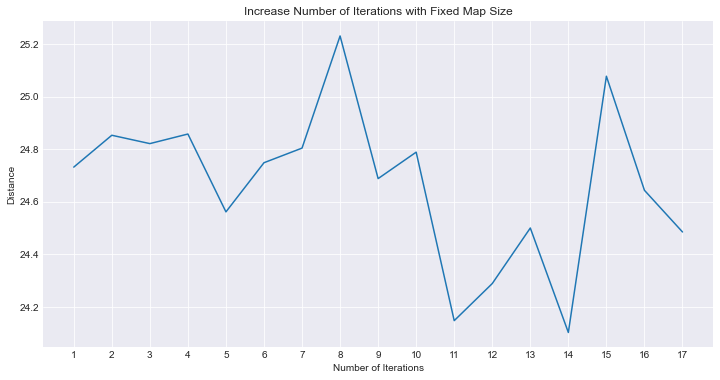

In [43]:
plt.figure(figsize = (12, 6))

plt.plot(iteration_based_distances)
plt.title('Increase Number of Iterations with Fixed Map Size')
plt.xticks(range(max_num_iterations), range(1,max_num_iterations+1))
plt.xlabel('Number of Iterations')
plt.ylabel('Distance')
plt.show()    

## Choice of Dimension

Rather than have you write yet another function that is very similar to the previous we are simply going to reuse your nn_iterative implementation and set the number of trials to 1 in order to test the affect the size of the reduced dimension.

Run the following code blocks to compute the distances of the nearest neighbors generated with your implementation of `nn_iterative` using projections of varying size.

In [35]:
max_reduced_dimension = 500
step_size = 10

dimension_based_distances = []
for n in range(10,max_reduced_dimension+1, step_size):
    (idx, nn) = nn_iterative(X, y, n, 1)
    dimension_based_distances.append(distance(y, nn))

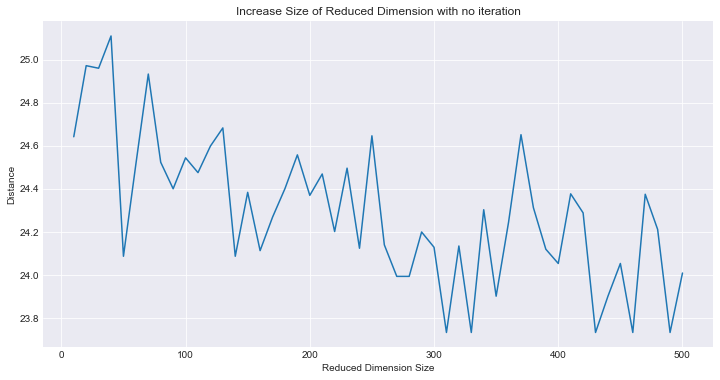

In [44]:
plt.figure(figsize = (12, 6))

plt.plot(range(10,max_reduced_dimension+1, step_size),dimension_based_distances)
plt.title('Increase Size of Reduced Dimension with no iteration')
plt.xlabel('Reduced Dimension Size')
plt.ylabel('Distance')
plt.show()    

## Iteration vs Dimension

Run the given code blocks to compute the distances of the nearest neighbors generated with your implementation of `nn_iterative` using projections of varying size with varying numbers of iterations.

In [37]:
iteration_based_distances_10 = []
for n in range(1,max_num_iterations+1):
    (idx, nn) = nn_iterative(X, y, 10, n)
    iteration_based_distances_10.append(distance(y, nn))

iteration_based_distances_500 = []
for n in range(1,max_num_iterations+1):
    (idx, nn) = nn_iterative(X, y, 500, n)
    iteration_based_distances_500.append(distance(y, nn))   

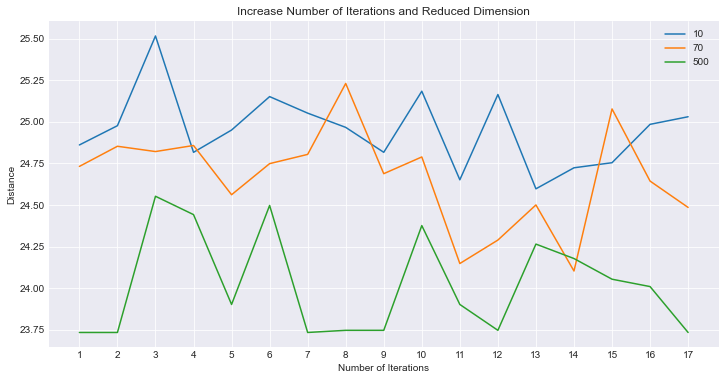

In [45]:
plt.figure(figsize = (12, 6))

plt.plot(iteration_based_distances_10)
plt.plot(iteration_based_distances) # computed in Iteration section
plt.plot(iteration_based_distances_500)

plt.title('Increase Number of Iterations and Reduced Dimension')
plt.xticks(range(max_num_iterations), range(1,max_num_iterations+1))
plt.xlabel('Number of Iterations')
plt.ylabel('Distance')
plt.legend(['10', f'{reduced_dimension}', '500'])
plt.show()    

### Short Answer

1. Describe any trends in your results above.  Does one approach clearly out-perform the other?  Why or why not?

In [39]:
run_time_stop = time.perf_counter()
print(f'Notebook Run Time = {(run_time_stop - run_time_start) / 60} minutes')

Notebook Run Time = 28.253097331183334 minutes
